In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<ipython-input-11-aae646eee8d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancer_Subtype', data=df, palette='Set2')


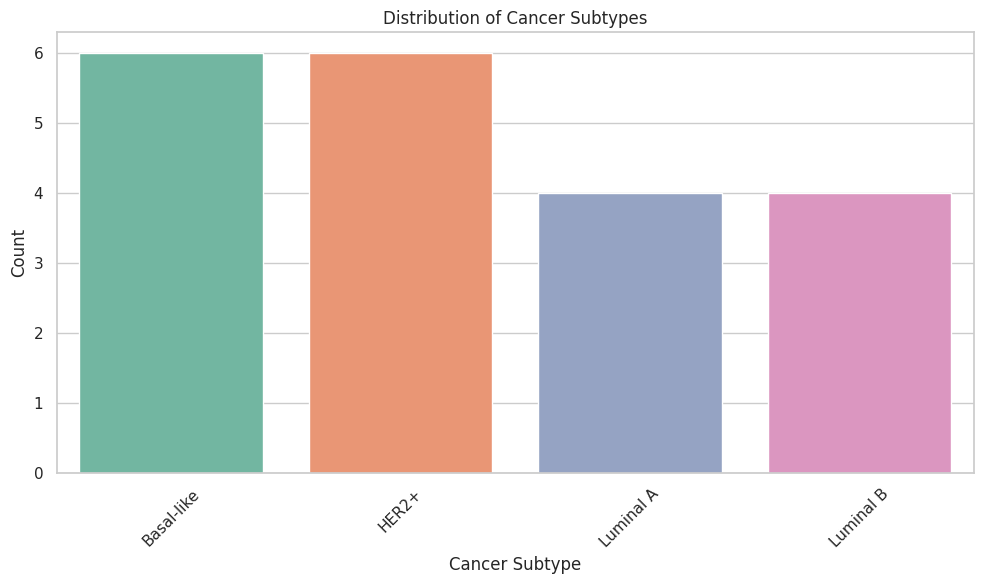

In [11]:
# Load the dataset
df = pd.read_csv('/content/genomic_cancer_subtype_dataset.csv')

# Plot the distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Cancer_Subtype', data=df, palette='Set2')
plt.title('Distribution of Cancer Subtypes')
plt.xlabel('Cancer Subtype')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Handle missing values if any
df = df.dropna()

# Split into features and labels
X = df.drop('Cancer_Subtype', axis=1)
y = df['Cancer_Subtype']

# Encode labels if not already numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
from sklearn.utils.multiclass import unique_labels

# Get only the labels present in y_test and y_pred
present_labels = unique_labels(y_test, y_pred)

# Convert numeric labels back to their string names
target_names = le.inverse_transform(present_labels)

# Now generate the classification report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Accuracy Score: 0.25

Classification Report:
               precision    recall  f1-score   support

  Basal-like       0.00      0.00      0.00         2
       HER2+       1.00      0.50      0.67         2
   Luminal B       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.33      0.17      0.22         4
weighted avg       0.50      0.25      0.33         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

<ipython-input-19-6b402f145e39>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


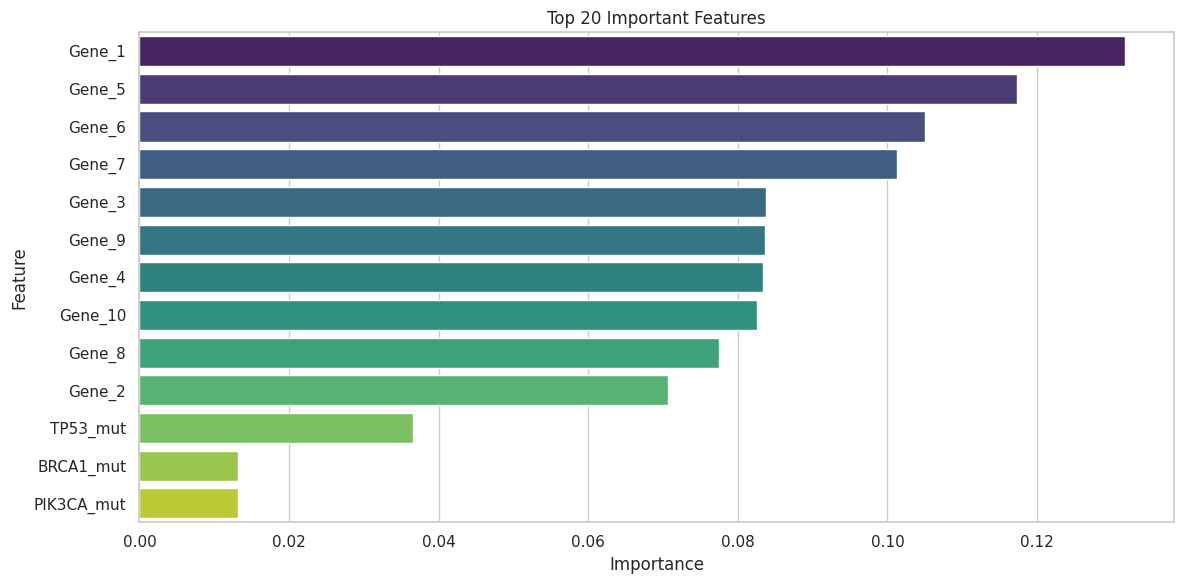

In [19]:
# Feature Importance
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for easy plotting
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 20 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create StratifiedKFold object with a lower number of splits
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Reduced n_splits to 3


# Create GridSearchCV object with the custom StratifiedKFold
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, scoring='accuracy') # Using skf for cv

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train a new model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the new model
y_pred = best_rf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.3
Accuracy Score: 0.5
